In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


def model_function(t, b, n):
    return 1 - np.exp(-b * t**n)

def model_function_simple(t, b): #assumes n is constant
    return 1 - np.exp(-b * t**2.1)


Fitted parameters: b = 5.277872493991535e-06, ln(b) = -12.151987478190954, n = 2.3808702111288578


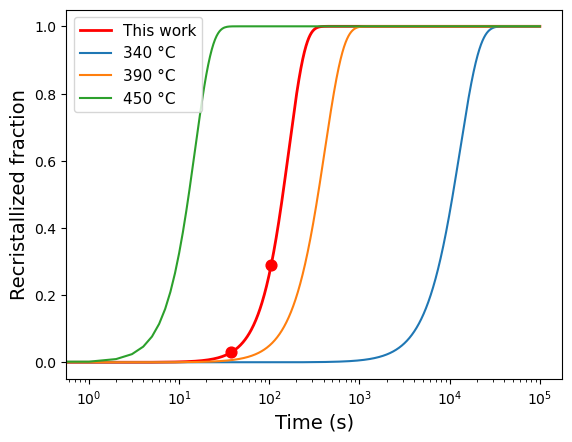

In [2]:
t_data = np.array([0, 38, 105]) #Our experimental data @Adi
X_data = np.array([0, 0.03, 0.29])

initial_guess = [np.exp(-10), 2.2]  # Initial guess for [b, n]
params, covariance = curve_fit(model_function, t_data, X_data, p0=initial_guess)
b_fit, n_fit = params
print(f"Fitted parameters: b = {b_fit}, ln(b) = {np.log(b_fit)}, n = {n_fit}")

t=np.linspace(0,100000,100000)
X_fit = model_function(t, b_fit, n_fit)



###PLOTS###
fig, ax = plt.subplots()
plt.scatter(t_data, X_data, color='red', s=60)
plt.plot(t, X_fit, color='red', label='This work', linewidth=2)

#Data from Chen et al.
plt.plot(t,model_function(t, np.exp(-18.95), 2), label='340 °C')
plt.plot(t,model_function(t, np.exp(-12.65), 2.1), label='390 °C')
plt.plot(t,model_function(t, np.exp(-6.23), 2.3), label='450 °C')

plt.xscale('log')
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Recristallized fraction', fontsize=14)
plt.legend(fontsize=11, loc='best')
fig.savefig('avrami_fit.png')
plt.show()


Fitted parameter: b = [1.93840066e-05], ln(b) = [-10.85106224]
Temperature is [406.62745832] °C


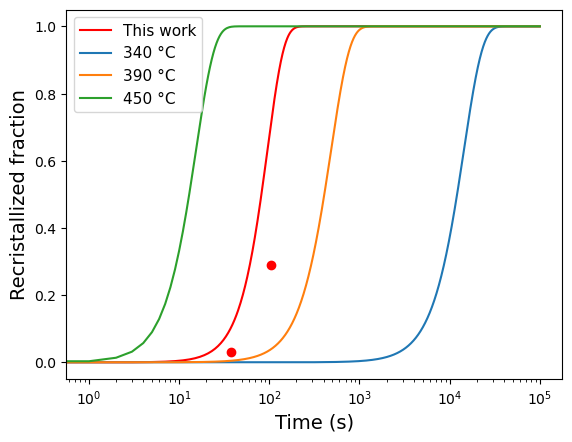

In [3]:
def find_T(y, a, b):
    return a / (y - b)

#Point A in the paper from Chen et al.
def model_function_simple(t, b):
    return 1 - np.exp(-b * t**2.1)

t_data = np.array([0, 38, 105])
X_data = np.array([0, 0.03, 0.29])

initial_guess = [np.exp(-10)]
params, covariance = curve_fit(model_function_simple, t_data, X_data, p0=initial_guess)
b_fit = params
print(f"Fitted parameter: b = {b_fit}, ln(b) = {np.log(b_fit)}")
print(f"Temperature is {find_T(np.log(b_fit), -57871, 74.3  )-273} °C")

X_fit = model_function(t, b_fit, n_fit)
plt.scatter(t_data, X_data, color='red')
plt.plot(t, X_fit, color='red', label='This work')

#Data from Chen et al.
plt.plot(t,model_function_simple(t, np.exp(-57871/(340+273)+74.3)), label='340 °C')
plt.plot(t,model_function_simple(t, np.exp(-57871/(390+273)+74.3)), label='390 °C')
plt.plot(t,model_function_simple(t, np.exp(-57871/(450+273)+74.3)), label='450 °C')


plt.xscale('log')
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Recristallized fraction', fontsize=14)
plt.legend(fontsize=11, loc='best')
fig.savefig('avrami_fit.png')
plt.show()

